# Problem Statement:

1.	An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.

---- ##### -----

Let us load necessary libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

----

Lets load our dataset

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

We have 50 rows and 5 columns in our dataset

Lets explore our dataset

In [4]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

We will change the name of couple of columns as these colums have spaces and special character which will impact later on when we will build our models

In [5]:
data.rename(columns={'R&D Spend':'RDS','Marketing Spend':'MS'},inplace=True)
data

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Lets explore our dataset

In [6]:
data.dtypes

RDS               float64
Administration    float64
MS                float64
State              object
Profit            float64
dtype: object

Lets check for any missing value in our dataset

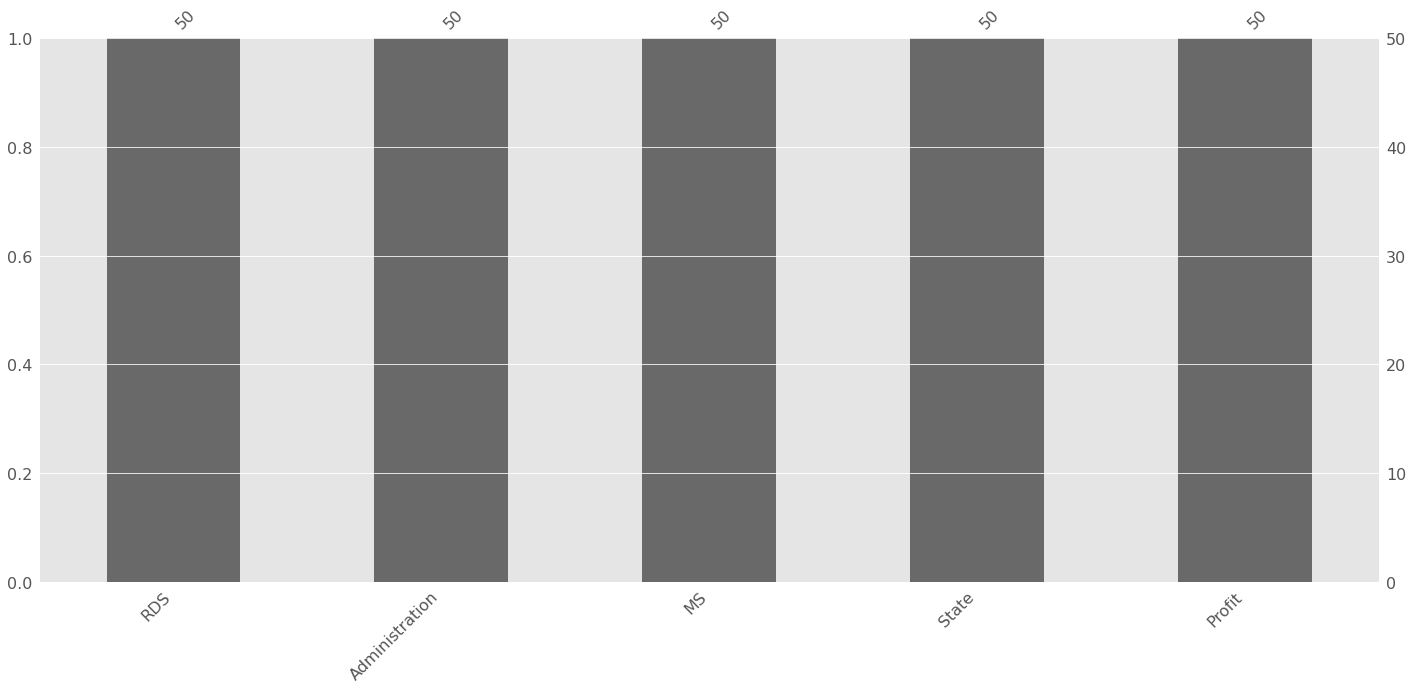

In [7]:
msno.bar(data)

In [8]:
data.describe()

,RDS,Administration,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


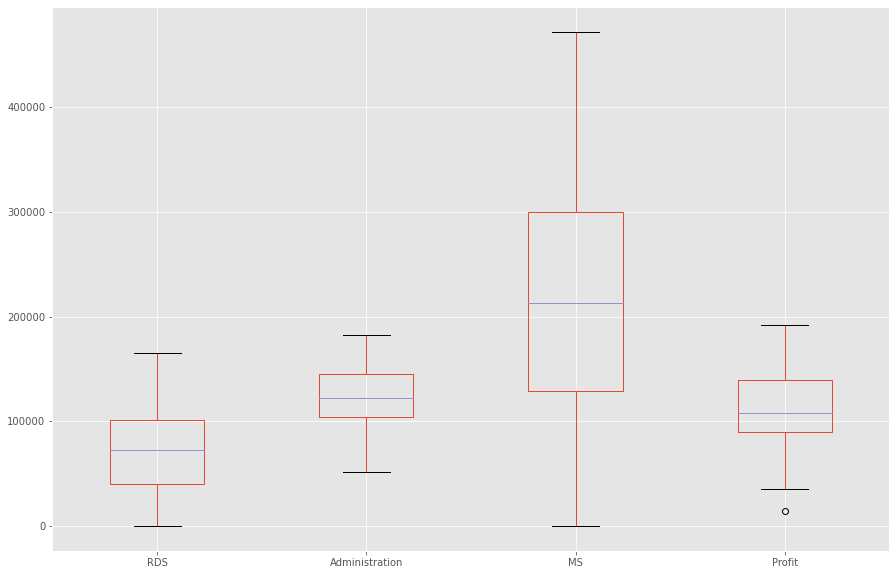

In [9]:
data[['RDS','Administration','MS','Profit']].plot(kind='box')

Seems like there is atleast one outlier in our dataset, This outlier is part of Profit column

Lets look at the relationship between variables

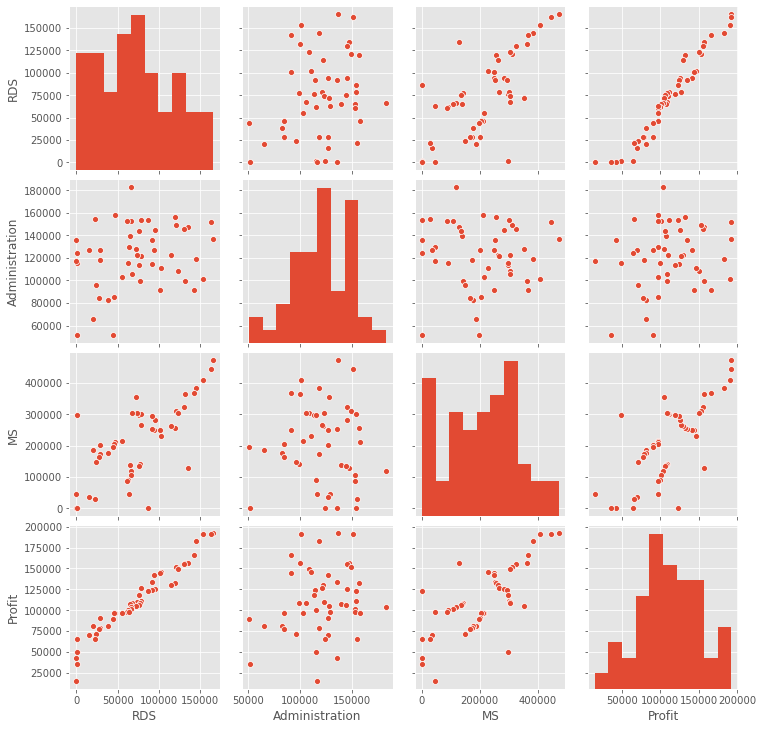

In [10]:
sns.pairplot(data)

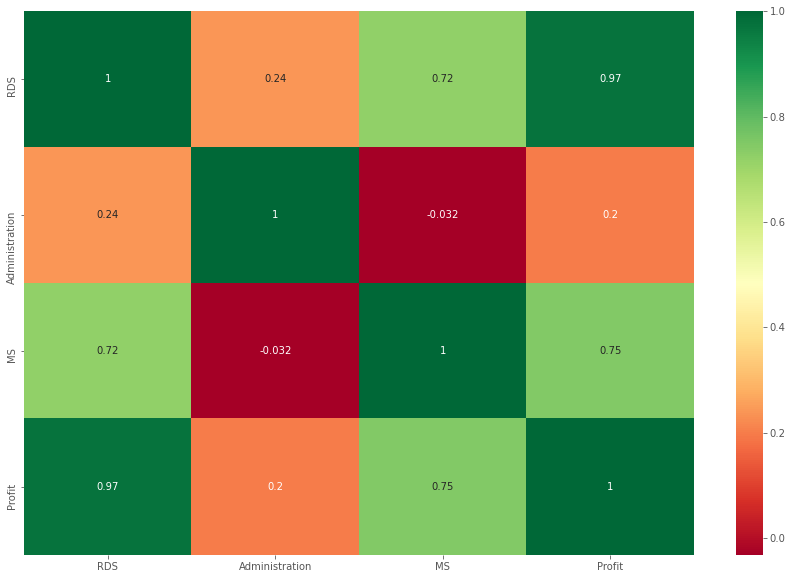

In [11]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

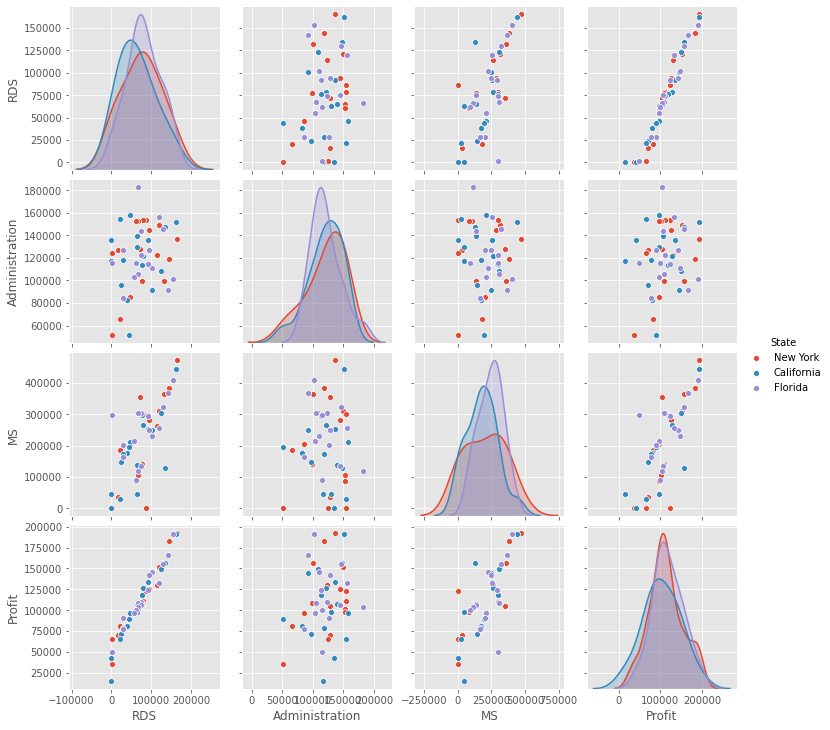

In [12]:
sns.pairplot(data,hue='State')

From the above visualization, we can say `Profit` and `RDS` are highly correlated with each other.
MS and Administration have nil to somewhat negative correlation

Q-Q Plot

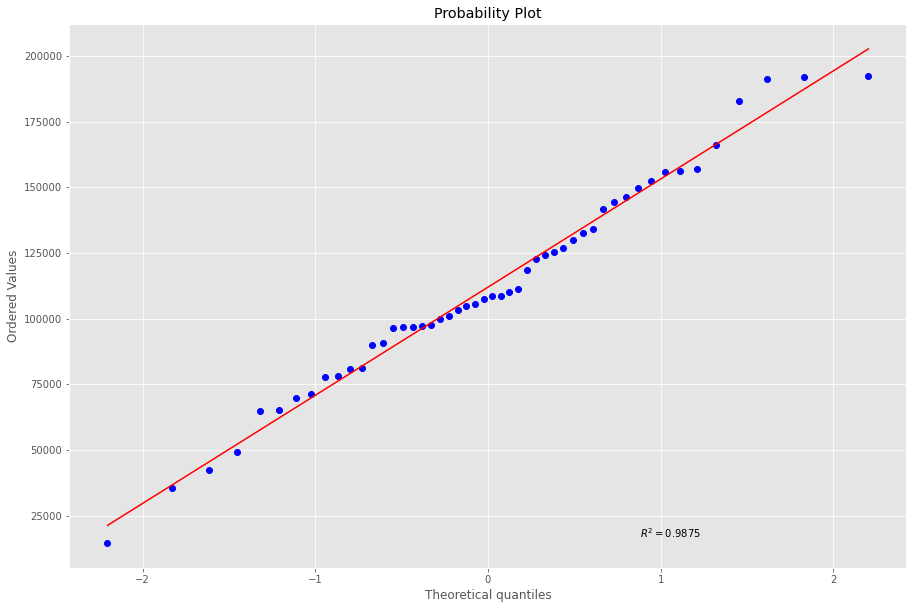

In [13]:
from scipy import stats
import pylab
stats.probplot(data.Profit, dist='norm', plot=pylab,rvalue=True)
plt.show()

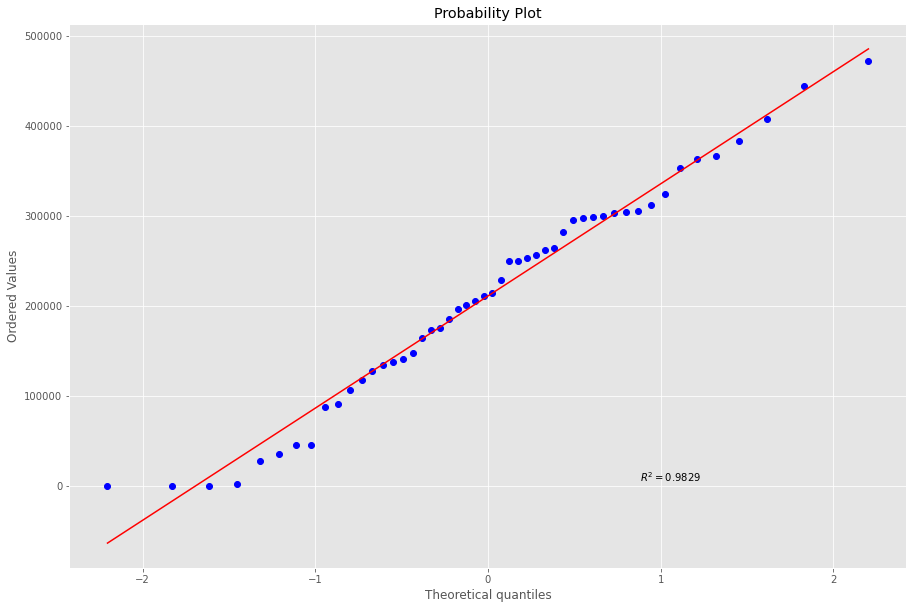

In [14]:
stats.probplot(data.MS, dist='norm', plot=pylab,rvalue=True)
plt.show()


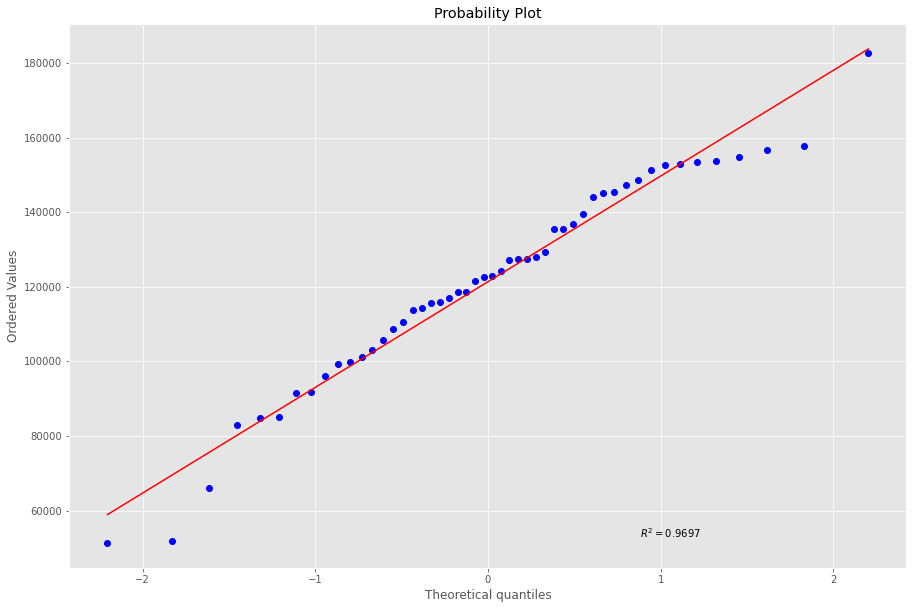

In [15]:
stats.probplot(data.Administration, dist='norm',plot=pylab,rvalue=True)
plt.show()

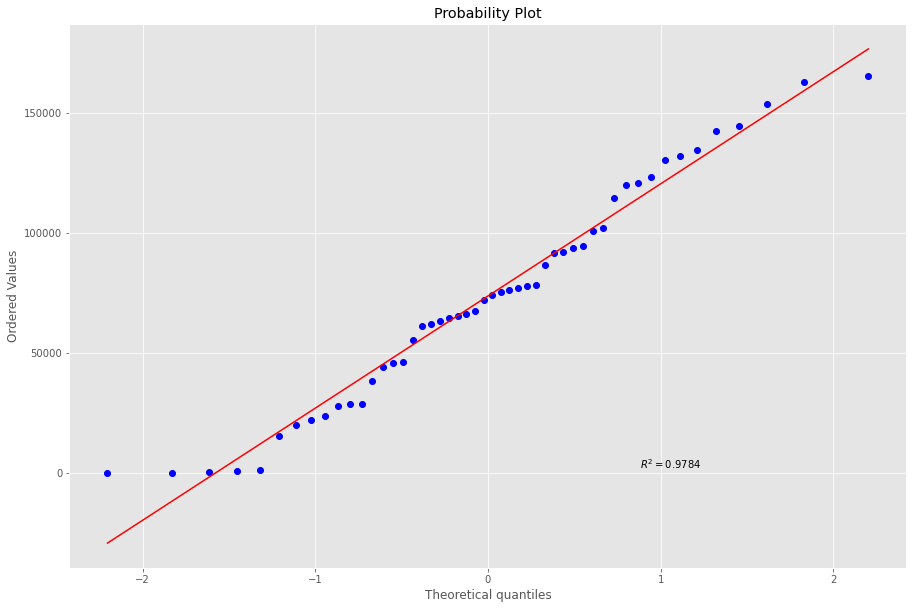

In [16]:
stats.probplot(data.RDS, dist='norm',plot=pylab,rvalue=True)
plt.show()

We will check for Co-linearity between input variables

In [17]:
import statsmodels.formula.api as smf

In [18]:
ml1 = smf.ols('Profit ~ RDS + MS + Administration', data= data).fit()

In [19]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.53e-30
Time:                        08:48:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS                0.8057      0.045     17.846      0.000       0.715       0.897
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p value of MS and Administration is greater then 0.05, lets check the influential values

Influence Index Plots

In [20]:
import statsmodels.api as sm

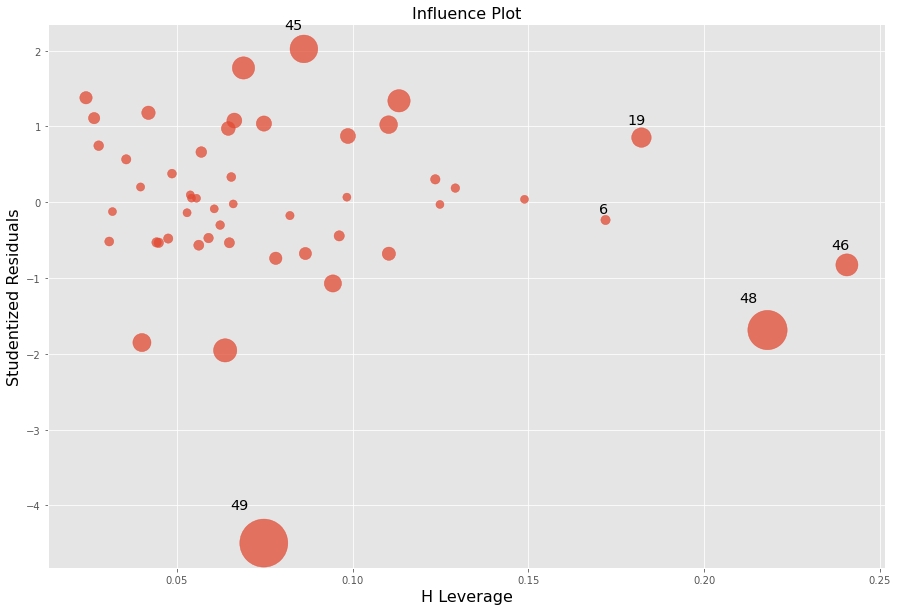

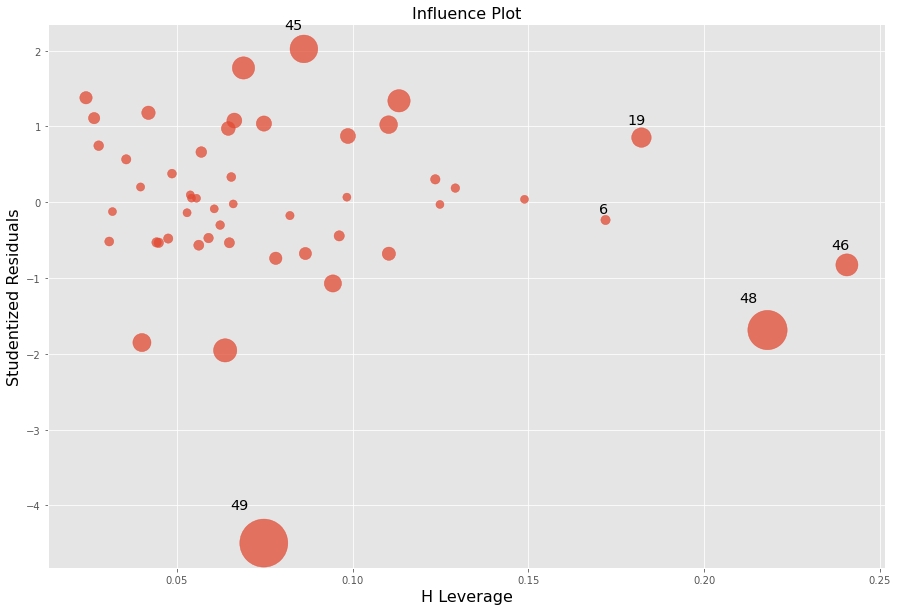

In [21]:
sm.graphics.influence_plot(ml1)

49th Row is showing high influence on our data, lets drop this row from our data and recheck the P values

In [22]:
data_new = data.drop(data.index[[49]])
data_new.shape

(49, 5)

Lets validate our model again

In [23]:
ml2 = smf.ols('Profit ~ RDS + MS + Administration', data= data_new).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           8.85e-32
Time:                        08:48:45   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS                0.7830      0.038     20.470      0.000       0.706       0.860
MS                 0.0252      0.014      1.825      0.075      -0.003       0.053
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will check for colinnearity to decide to remove a variable using VIF score<br> Assumption: VIF > 10 = colinearity <br> Caluclating VIF's value of independent variables

In [24]:
rsq_profit = smf.ols('Profit ~ RDS + MS + Administration', data = data).fit().rsquared
vif_profit = 1/(1 - rsq_profit)

In [25]:
rsq_rds = smf.ols('RDS ~ Profit + MS + Administration', data = data).fit().rsquared
vif_rds = 1/(1 - rsq_rds)

In [26]:
rsq_ms = smf.ols('MS ~ RDS + Profit + Administration', data = data).fit().rsquared
vif_ms = 1/(1 - rsq_ms)

In [27]:
rsq_admin = smf.ols('Administration ~ RDS + Profit + MS', data = data).fit().rsquared
vif_admin = 1/(1 - rsq_admin)

In [28]:
# Sorting vif values in a dataframe

In [29]:
df1 = {'Variables':['Profit','RDS','MS','Administration'],'VIF':[vif_profit,vif_rds,vif_ms,vif_admin]}
vif_frame = pd.DataFrame(df1)
vif_frame

,Variables,VIF
0,Profit,20.302917
1,RDS,19.563001
2,MS,2.465332
3,Administration,1.182146


We will drop RDS from our prediction model

In [30]:
final_ml = smf.ols('Profit ~ MS + Administration', data = data).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.50e-10
Time:                        08:48:45   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
MS                 0.2488      0.030      8.281      0.000       0.188       0.309
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predictions:

In [31]:
pred = final_ml.predict(data)

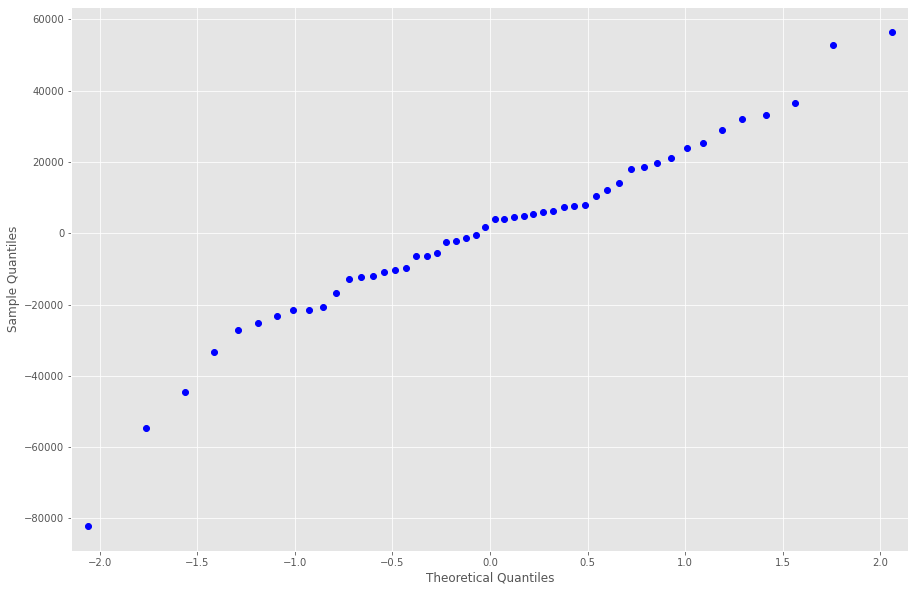

In [32]:
# Q - Q Plot

res = final_ml.resid
sm.qqplot(res)
plt.show()

Residual vs Fitted Plot

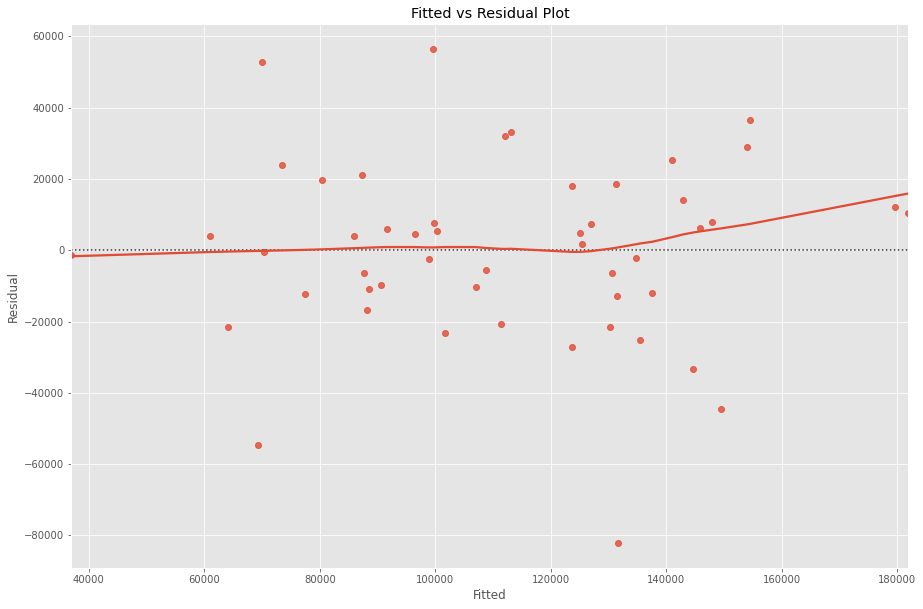

In [33]:
sns.residplot(x= pred, y = data.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual Plot')
plt.show()

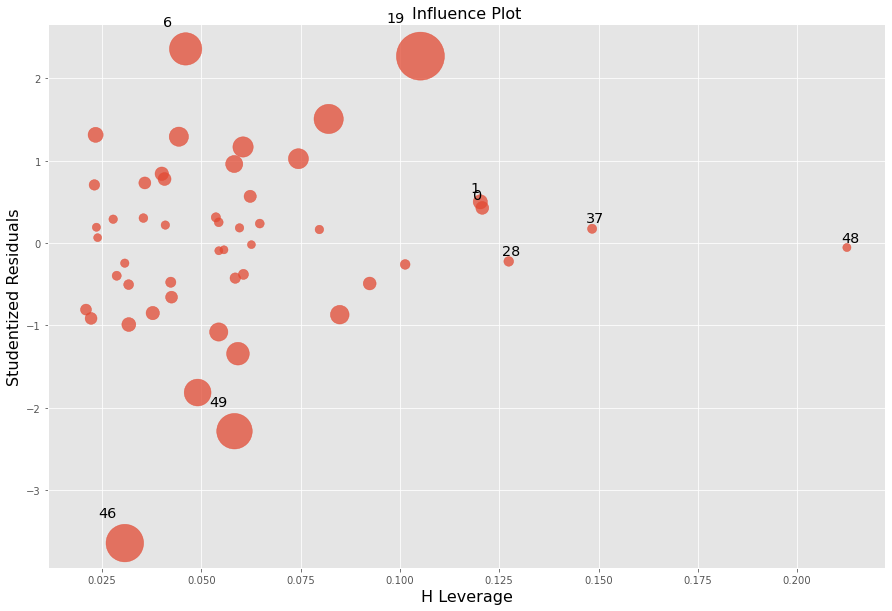

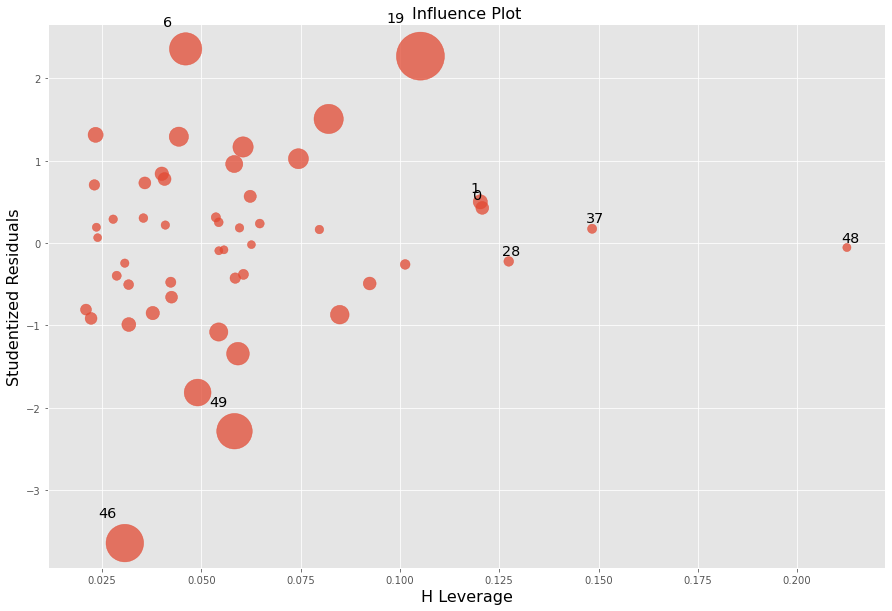

In [34]:
sm.graphics.influence_plot(final_ml)

Building models

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
data_train, data_test = train_test_split(data, test_size=0.2)

In [37]:
# preparing the model on train data

model_train = smf.ols('Profit ~ MS + Administration', data= data_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     25.24
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.22e-07
Time:                        08:48:47   Log-Likelihood:                -463.88
No. Observations:                  40   AIC:                             933.8
Df Residuals:                      37   BIC:                             938.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.789e+04   2.38e+04      0.752      0.457   -3.03e+04    6.61e+04
MS                 0.2423      0.035      7.007      0.000       0.172       0.312
Administration     0.3581      0.170      2.106      0.042       0.014       0.703
==============================================================================
Omnibus:                        6.275   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.220
Skew:                          -0.622   Prob(JB):                       0.0735
Kurtosis:                       4.259   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
test_pred = model_train.predict(data_test)

In [39]:
test_resid = test_pred - data_test.Profit

In [40]:
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

18567.56356142174

In [41]:
# Train_data predictions

In [42]:
train_pred = model_train.predict(data_train)

In [43]:
train_resid = train_pred - data_train.Profit
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

26320.258602241436

# Model Number 2

### We will create dummy variables for our state column and see if our RMSE score improves

In [67]:
backup = data

In [68]:
data_dummied = pd.get_dummies(data,columns=['State'])

In [69]:
data_dummied

,RDS,Administration,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [52]:
data_dummied.corr()

,RDS,Administration,MS,Profit,State_California,State_Florida,State_New York
RDS,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [51]:
data_dummied.columns

Index(['RDS', 'Administration', 'MS', 'Profit', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

In [70]:
ml2 = smf.ols('Profit ~ RDS + Administration + MS + State_California + State_Florida',data=data_dummied).fit()

In [71]:
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.34e-27
Time:                        09:10:29   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
RDS                  0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                   0.0270      0.017      1.574      0.123      -0.008       0.062
State_California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
State_Florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Many columns have p value greater then 0.05. Lets check the influential chart to understand which row is impacting it the most

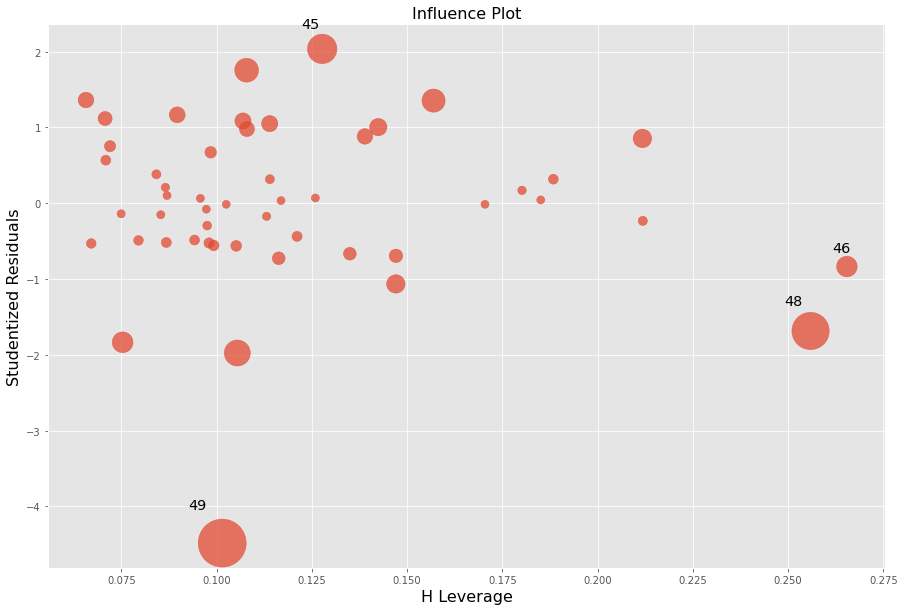

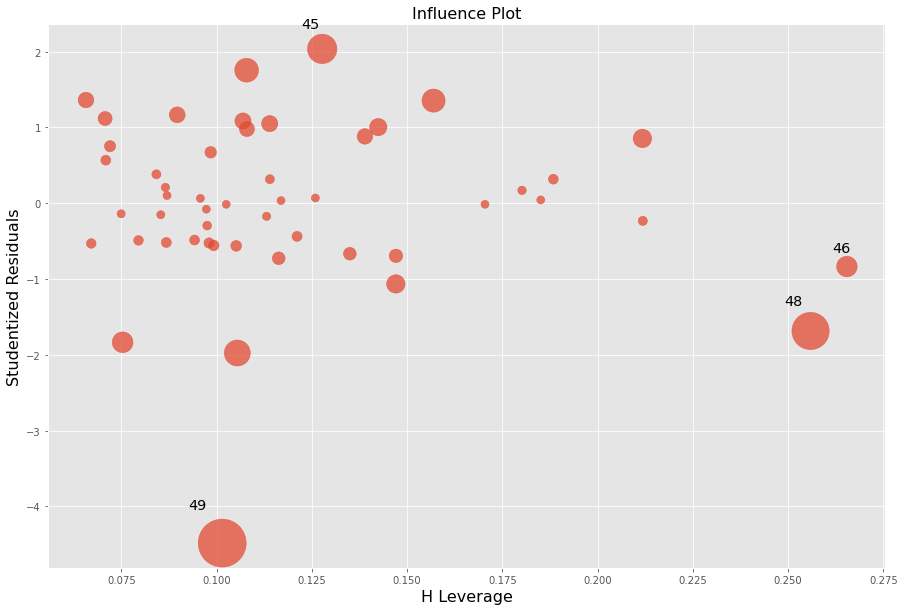

In [58]:
sm.graphics.influence_plot(ml2)

Lets drop row number 49 from this new data frame

In [72]:
data_new = data_dummied.drop(data_dummied.index[[49]])

In [61]:
ml2 = smf.ols('Profit ~ RDS + Administration + MS + State_California + State_Florida',data=data_new).fit()

In [62]:
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.51e-29
Time:                        09:06:04   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
RDS                  0.7836      0.039     20.056      0.000       0.705       0.862
Administration      -0.0220      0.044     -0.505      0.616      -0.110       0.066
MS                   0.0258      0.014      1.804      0.078      -0.003       0.055
State_California  1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
State_Florida      389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

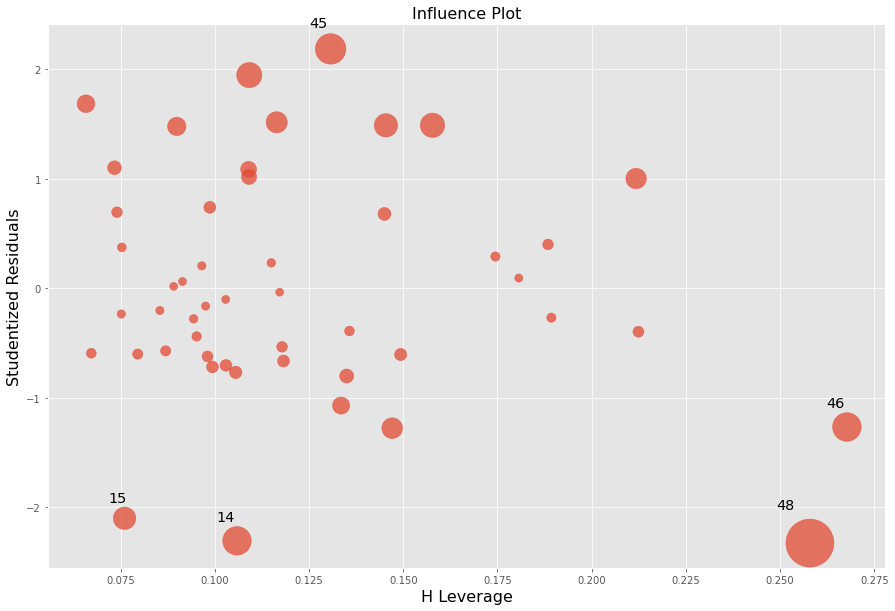

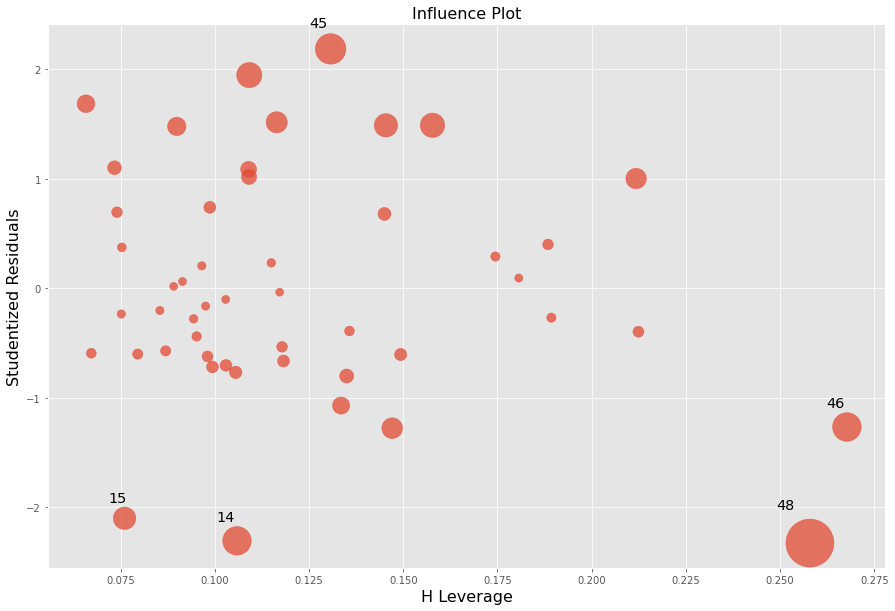

In [63]:
sm.graphics.influence_plot(ml2)

Lets drop column number 48 and see what impact it has on our model summary

In [64]:
data_new = data_dummied.drop(data_dummied.index[[48]])

In [65]:
ml2 = smf.ols('Profit ~ RDS + Administration + MS + State_California + State_Florida',data=data_new).fit()

In [66]:
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     163.7
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           7.82e-27
Time:                        09:08:58   Log-Likelihood:                -513.80
No. Observations:                  49   AIC:                             1040.
Df Residuals:                      43   BIC:                             1051.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.656e+04   7820.911      7.232      0.000    4.08e+04    7.23e+04
RDS                  0.8111      0.046     17.802      0.000       0.719       0.903
Administration      -0.0629      0.055     -1.135      0.263      -0.175       0.049
MS                   0.0199      0.017      1.153      0.255      -0.015       0.055
State_California -1151.1433   3267.466     -0.352      0.726   -7740.617    5438.330
State_Florida     -542.5412   3303.885     -0.164      0.870   -7205.460    6120.378
==============================================================================
Omnibus:                       18.908   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.050
Skew:                          -1.125   Prob(JB):                     6.66e-08
Kurtosis:                       6.335   Cond. No.                     1.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Post removing row number 48 the p values of some variables have increased. So we will not drop row number 48 from our dataset

In [73]:
data_new

,RDS,Administration,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


We will check for Co-Linearity to decide whether we need to remove a variable. We will use VIF 
Assumption is VIF > 10 = Colinearity
We will calculate VIF of indenpendent variables

In [76]:
data_new.columns

Index(['RDS', 'Administration', 'MS', 'Profit', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

We will exclude New York State from our calculation to avoid, dummy variable trap

In [77]:
rsq_RDS = smf.ols('RDS ~ Administration + MS + State_California + State_Florida', data = data_new).fit().rsquared
vif_RDS = 1/(1 - rsq_RDS)

In [79]:
rsq_Administration = smf.ols('Administration ~ RDS + MS + State_California + State_Florida', data = data_new).fit().rsquared
vif_Adminstration = 1/(1 - rsq_Administration)

In [81]:
rsq_MS = smf.ols('MS ~ RDS + Administration + State_California + State_Florida', data = data_new).fit().rsquared
vif_MS = 1/(1 - rsq_MS)

In [83]:
rsq_California = smf.ols('State_California ~ RDS + Administration + MS + State_Florida', data = data_new).fit().rsquared
vif_California = 1/(1-rsq_California)

In [84]:
rsq_Florida = smf.ols('State_Florida ~ RDS + Administration + MS + State_California', data = data_new).fit().rsquared
vif_Florida = 1/(1-rsq_Florida)

Lets save the VIF values in a data frame

In [85]:
d2 = {'Variables':['RDS','Administration','MS','California','Florida'], 'VIF':[vif_RDS,vif_Adminstration,vif_MS,vif_California,vif_Florida]}
vif_df = pd.DataFrame(d2)
vif_df

,Variables,VIF
0,RDS,2.400821
1,Administration,1.177936
2,MS,2.324983
3,California,1.313708
4,Florida,1.348417


We will not remove any column from the analysis and will include them for making our model

Final_Model_2

In [86]:
final_model_2 = smf.ols('Profit ~ RDS + Administration + MS + State_California + State_Florida',data=data_new).fit()
final_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.51e-29
Time:                        09:23:59   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
RDS                  0.7836      0.039     20.056      0.000       0.705       0.862
Administration      -0.0220      0.044     -0.505      0.616      -0.110       0.066
MS                   0.0258      0.014      1.804      0.078      -0.003       0.055
State_California  1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
State_Florida      389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
pred = final_model_2.predict(data_new)

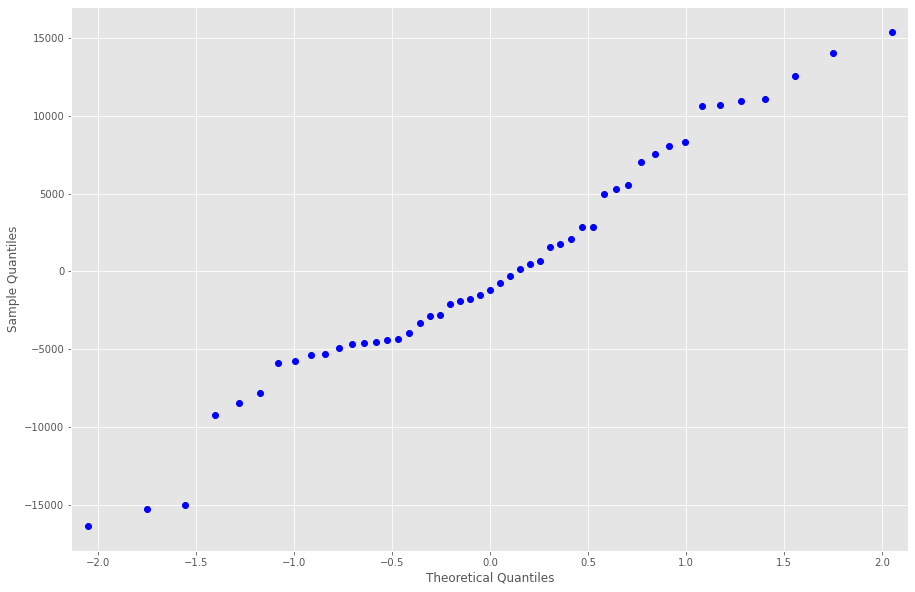

In [90]:
# Q-Q plot
res = final_model_2.resid
sm.qqplot(res)
plt.show()

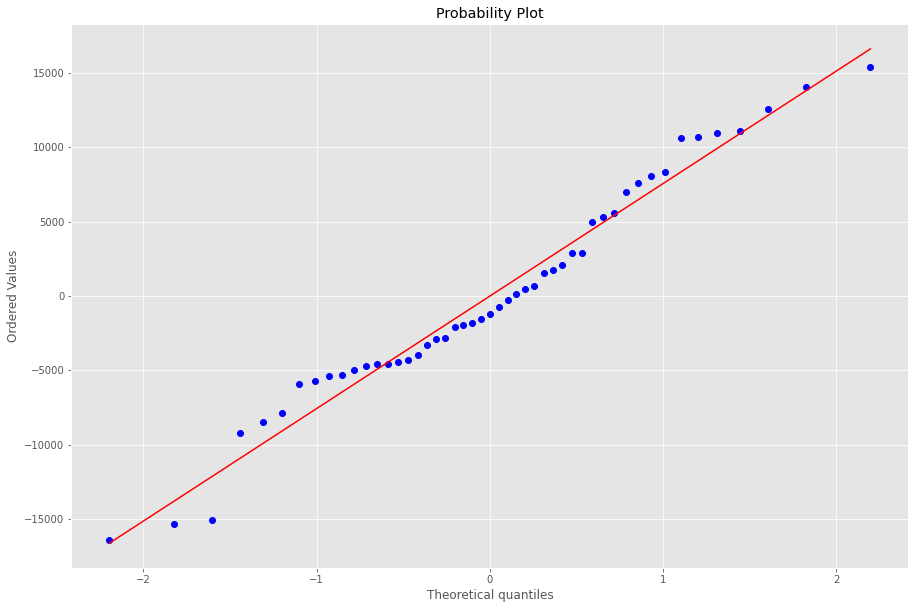

In [91]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

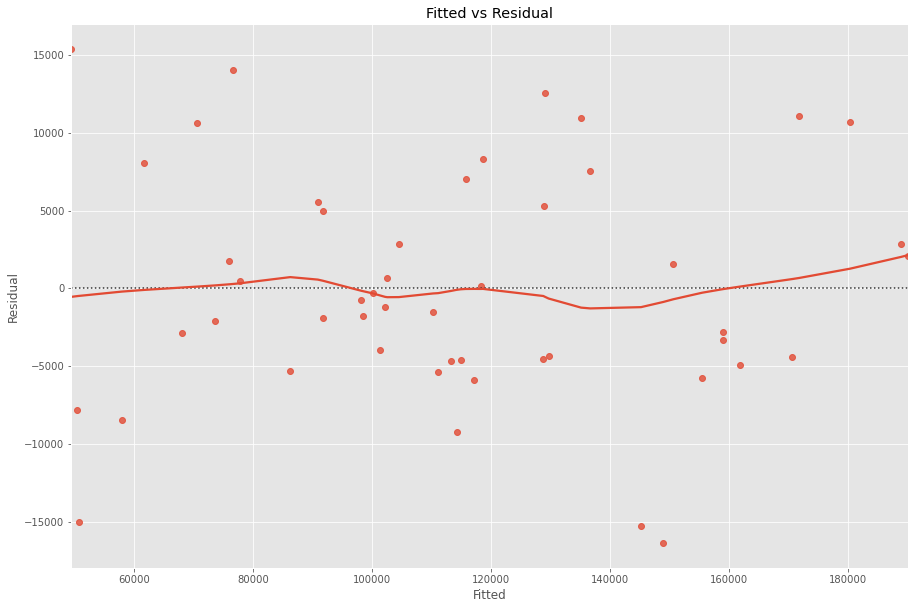

In [92]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = data_new.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

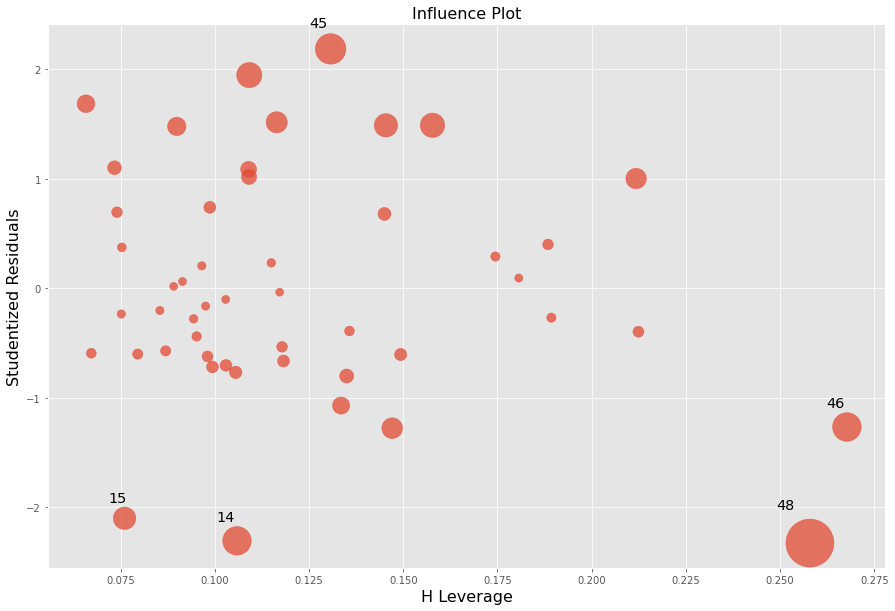

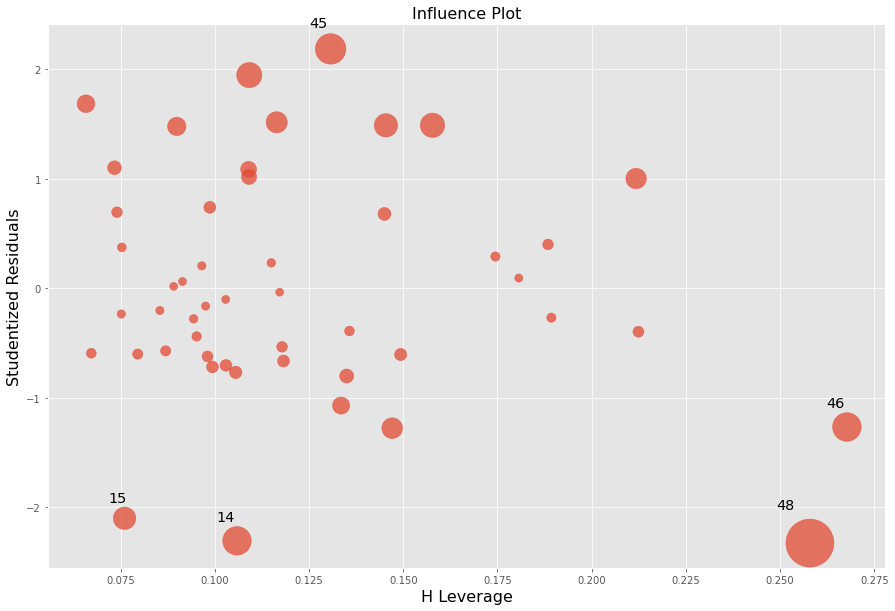

In [93]:
sm.graphics.influence_plot(final_model_2)

We will now split our data into Train and Test split

In [94]:
data_new_train, data_new_test = train_test_split(data_new, test_size = 0.20)

In [95]:
model_train1 = smf.ols('Profit ~ RDS + Administration + MS + State_California + State_Florida',data=data_new_train).fit()
model_train1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     164.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.64e-22
Time:                        11:37:22   Log-Likelihood:                -402.91
No. Observations:                  39   AIC:                             817.8
Df Residuals:                      33   BIC:                             827.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.964e+04   6370.305      7.792      0.000    3.67e+04    6.26e+04
RDS                  0.7754      0.044     17.602      0.000       0.686       0.865
Administration      -0.0157      0.050     -0.315      0.755      -0.117       0.086
MS                   0.0340      0.016      2.077      0.046       0.001       0.067
State_California  2402.6228   3179.636      0.756      0.455   -4066.395    8871.640
State_Florida     -538.0719   3251.812     -0.165      0.870   -7153.934    6077.790
==============================================================================
Omnibus:                        0.074   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.275
Skew:                          -0.047   Prob(JB):                        0.872
Kurtosis:                       2.600   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
test_pred1 = model_train1.predict(data_new_train)

In [100]:
test_resid = test_pred1 - data_new_train.Profit

In [101]:
test_rmse1 = np.sqrt(np.mean(test_resid * test_resid))
test_rmse1

7422.009996354746